# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [36]:
import pandas as pd 
data = pd.read_excel('geo.xlsx')
data = data.iloc[:, 1:4]
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

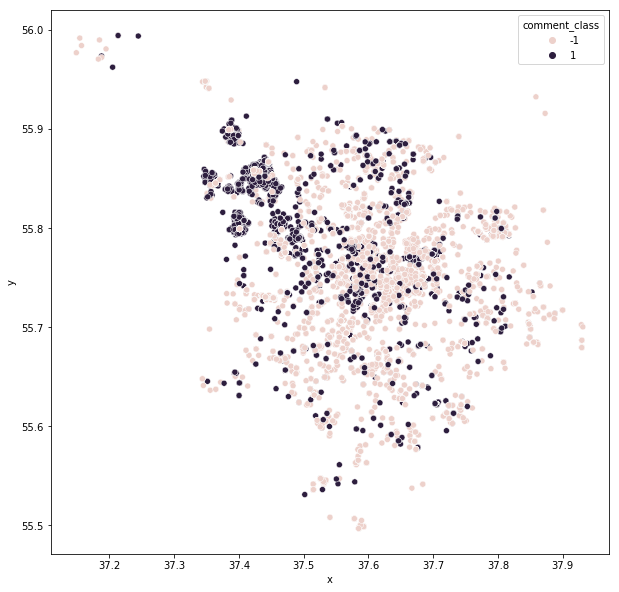

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x="x", y="y", hue="comment_class")

In [39]:
X = data.iloc[:, 0:2]
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

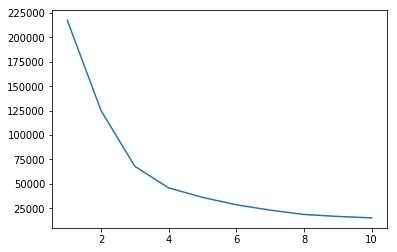

In [43]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)

In [45]:
import numpy as np
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [46]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=3)
clusters = alg.fit_predict(X_scaled)


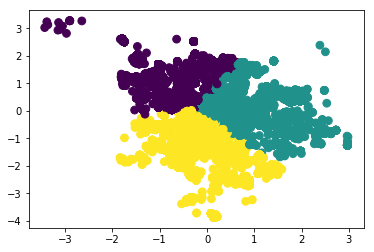

In [47]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)

In [48]:
data_neg = data[data['comment_class'] == -1]
data_pos = data[data['comment_class'] == 1]

In [49]:
X_neg = data_neg.iloc[:, 0:2]
X_pos = data_pos.iloc[:, 0:2]

In [50]:
X_neg_scaled = scaler.fit_transform(X_neg)
X_pos_scaled = scaler.fit_transform(X_pos)

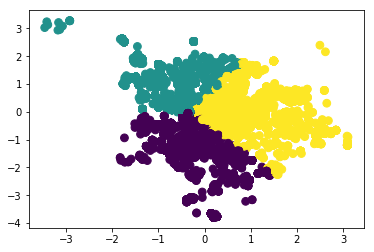

In [52]:
alg_neg = KMeans(n_clusters=3)
clusters_neg = alg_neg.fit_predict(X_neg_scaled)
plt.scatter(X_neg_scaled[:, 0], X_neg_scaled[:, 1], c=clusters_neg, s=60)

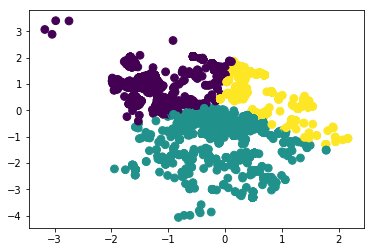

In [53]:
alg_pos = KMeans(n_clusters=3)
clusters_pos = alg_pos.fit_predict(X_pos_scaled)
plt.scatter(X_pos_scaled[:, 0], X_pos_scaled[:, 1], c=clusters_pos, s=60)